In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [57]:
request_prefix = "https://api.tfl.gov.uk"
request_url = request_prefix + "/AccidentStats/2018"
resp = requests.get(request_url)

if not resp.ok:
    raise ConnectionError("Bad response. Terminating...")

print("Successful request.")

Successful request.


In [58]:
df = pd.DataFrame.from_dict(resp.json())
df.drop('$type', axis=1, inplace=True)
df.head()

,borough,casualties,date,id,lat,location,lon,severity,vehicles
0,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,2018-03-07T08:25:00Z,320725,51.539269,Finchley Road 25 metres south of junction with...,-0.175777,Slight,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
1,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,2018-03-07T08:17:00Z,320726,51.501083,Parliament Street junction with Great George S...,-0.126441,Slight,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
2,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,2018-03-06T09:55:00Z,320727,51.526162,Saint John's Wood Road junction with northwick...,-0.177166,Serious,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
3,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,2018-03-07T20:15:00Z,320728,51.509212,Jermyn Street junction with Regent Street St J...,-0.134322,Slight,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
4,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,2018-03-08T03:20:00Z,320729,51.523338,Edgware Road junction with Framton Street,-0.174828,Slight,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...


In [59]:
df_backup = df.copy() # no touching

In [60]:
# to reset df:
df = df_backup.copy()

## Clean the vehicles column

In [61]:
vehicles_cell = df['vehicles'][0]
vehicles_cell

[{'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.Vehicle, Tfl.Api.Presentation.Entities',
  'type': 'PedalCycle'},
 {'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.Vehicle, Tfl.Api.Presentation.Entities',
  'type': 'BusOrCoach'}]

In [62]:
def get_vehicles(cell):
    ls = []
    for i in cell:
        ls.append(i['type'])
    return ls

df['vehicles'] = df['vehicles'].apply(get_vehicles)

In [63]:
df.head(5)

,borough,casualties,date,id,lat,location,lon,severity,vehicles
0,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,2018-03-07T08:25:00Z,320725,51.539269,Finchley Road 25 metres south of junction with...,-0.175777,Slight,"[PedalCycle, BusOrCoach]"
1,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,2018-03-07T08:17:00Z,320726,51.501083,Parliament Street junction with Great George S...,-0.126441,Slight,"[PedalCycle, LightGoodsVehicle]"
2,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,2018-03-06T09:55:00Z,320727,51.526162,Saint John's Wood Road junction with northwick...,-0.177166,Serious,"[PedalCycle, Car]"
3,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,2018-03-07T20:15:00Z,320728,51.509212,Jermyn Street junction with Regent Street St J...,-0.134322,Slight,"[Motorcycle_50_125cc, Car]"
4,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,2018-03-08T03:20:00Z,320729,51.523338,Edgware Road junction with Framton Street,-0.174828,Slight,"[Car, Car]"


## Total number of accidents per area

In [64]:
df.borough.value_counts()

City of Westminster       3020
Lambeth                   2574
Southwark                 2300
Tower Hamlets             2260
Barnet                    1986
Wandsworth                1968
Ealing                    1890
Brent                     1862
Camden                    1822
Enfield                   1784
Croydon                   1782
Haringey                  1714
Newham                    1712
Hackney                   1710
Lewisham                  1672
Hounslow                  1572
Islington                 1536
Redbridge                 1514
Bromley                   1474
Hillingdon                1450
Greenwich                 1430
Waltham Forest            1424
Hammersmith and Fulham    1414
Kensington and Chelsea    1366
Barking and Dagenham      1164
Havering                  1148
Merton                     994
Bexley                     972
Richmond upon Thames       888
Harrow                     828
Sutton                     814
Kingston                   662
City of 

## Top 5 areas with the most number of accidents

In [65]:
df.borough.value_counts().head()

City of Westminster    3020
Lambeth                2574
Southwark              2300
Tower Hamlets          2260
Barnet                 1986
Name: borough, dtype: int64

## Top 5 date with the most cases of accidents

In [66]:
import re
date_pattern = re.compile(r'\d{4}-\d{2}-\d{2}')

def get_date(cell):
    new_cell = date_pattern.match(cell)
    return new_cell.group()
 
df.date.apply(get_date).value_counts().head()

2018-06-29    228
2018-06-21    222
2018-05-08    214
2018-11-02    212
2018-04-18    210
Name: date, dtype: int64

## Most of the cases are slight

In [67]:
df.severity.value_counts()

Slight     43400
Serious     7656
Fatal        218
Name: severity, dtype: int64

## Top 5 vehicles involved in most accidents

In [68]:
from collections import Counter
vehicles_dict = Counter()

def count_vehicles(cell):
    for i in cell:
        vehicles_dict[i] += 1
           
df.vehicles.apply(count_vehicles)
top_five = vehicles_dict.most_common(5)
top_five

[('Car', 53906),
 ('PedalCycle', 10032),
 ('Motorcycle_50_125cc', 6478),
 ('LightGoodsVehicle', 5514),
 ('Taxi', 4594)]

In [69]:
total_vehicles = sum(vehicles_dict.values())
total_vehicles

91840

In [70]:
top_five_sum = 0
for i in top_five:
    top_five_sum += i[1]   
top_five_sum
others_sum = total_vehicles - top_five_sum

In [71]:
top_five.append(('Others',others_sum))

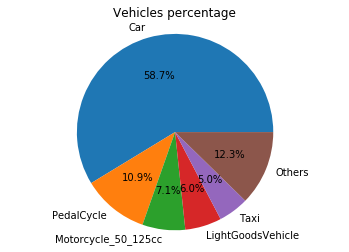

In [72]:
vehicle_names, quantities = zip(*top_five)
plt.pie(quantities, labels=vehicle_names, autopct='%1.1f%%')
plt.title('Vehicles percentage')
plt.axis('equal')
plt.show()

## Vehicles summarization

In [73]:
vehicles_dict

Counter({'PedalCycle': 10032,
         'BusOrCoach': 3632,
         'LightGoodsVehicle': 5514,
         'Car': 53906,
         'Motorcycle_50_125cc': 6478,
         'Motorcycle_500cc_Plus': 2378,
         'Taxi': 4594,
         'Motorcycle_125_500cc': 1678,
         'Motorcycle_0_50cc': 1110,
         'MediumGoodsVehicle': 544,
         'OtherMotorVehicle': 1066,
         'HeavyGoodsVehicle': 684,
         'AgriculturalVehicle': 30,
         'Minibus': 188,
         'RiddenHorse': 6})

In [74]:
print('Vehicle name'.ljust(50," "),'Total')
for _key, _value in vehicles_dict.most_common():
    print(_key.ljust(50, "."), _value)

Vehicle name                                       Total
Car............................................... 53906
PedalCycle........................................ 10032
Motorcycle_50_125cc............................... 6478
LightGoodsVehicle................................. 5514
Taxi.............................................. 4594
BusOrCoach........................................ 3632
Motorcycle_500cc_Plus............................. 2378
Motorcycle_125_500cc.............................. 1678
Motorcycle_0_50cc................................. 1110
OtherMotorVehicle................................. 1066
HeavyGoodsVehicle................................. 684
MediumGoodsVehicle................................ 544
Minibus........................................... 188
AgriculturalVehicle............................... 30
RiddenHorse....................................... 6


## Number of accidents per area

In [75]:
area = df.groupby(['borough','severity'])
area_count = area.count()
area_count.head()

casualties  date   id  lat  location  lon  \
borough              severity                                              
Barking and Dagenham Fatal              2     2    2    2         2    2   
                     Serious          190   190  190  190       190  190   
                     Slight           972   972  972  972       972  972   
Barnet               Fatal              8     8    8    8         8    8   
                     Serious          252   252  252  252       252  252   

                               vehicles  
borough              severity            
Barking and Dagenham Fatal            2  
                     Serious        190  
                     Slight         972  
Barnet               Fatal            8  
                     Serious        252

In [76]:
areas_to_accidents = area_count[['casualties']]
#areas_to_accidents.loc['Barnet']
areas_to_accidents.head(10)

casualties
borough              severity            
Barking and Dagenham Fatal              2
                     Serious          190
                     Slight           972
Barnet               Fatal              8
                     Serious          252
                     Slight          1726
Bexley               Fatal              6
                     Serious          148
                     Slight           818
Brent                Fatal             10

## Number of people in each severity in each area

In [77]:
casualties_num = df['casualties'].apply(len)
df['casualties_people_num'] = casualties_num

In [78]:
casualties_people_num = df.groupby(['borough','severity'])['casualties_people_num'].sum()
casualties_people_num_frame = casualties_people_num.to_frame()

In [79]:
casualties_people_num_frame.head(10)

casualties_people_num
borough              severity                       
Barking and Dagenham Fatal                         4
                     Serious                     244
                     Slight                     1340
Barnet               Fatal                        10
                     Serious                     300
                     Slight                     2116
Bexley               Fatal                         6
                     Serious                     202
                     Slight                     1064
Brent                Fatal                        12

In [80]:
casualties_people_num_frame.loc['Brent']

,casualties_people_num
severity,
Fatal,12
Serious,352
Slight,1846


In [81]:
casualties_people_num_frame.loc['Brent'].loc['Serious']

casualties_people_num    352
Name: Serious, dtype: int64

## Total number of injured&dead people in each area

In [82]:
casualties_people_num_frame.groupby('borough')['casualties_people_num'].sum()

borough
Barking and Dagenham      1588
Barnet                    2426
Bexley                    1272
Brent                     2210
Bromley                   1788
Camden                    2048
City of London             626
City of Westminster       3420
Croydon                   2098
Ealing                    2326
Enfield                   2256
Greenwich                 1774
Hackney                   1970
Hammersmith and Fulham    1576
Haringey                  2036
Harrow                    1020
Havering                  1568
Hillingdon                1836
Hounslow                  1914
Islington                 1704
Kensington and Chelsea    1500
Kingston                   778
Lambeth                   2916
Lewisham                  2022
Merton                    1196
Newham                    2172
Redbridge                 1974
Richmond upon Thames      1004
Southwark                 2578
Sutton                    1016
Tower Hamlets             2668
Waltham Forest            1686


## Split the date for clearer info

In [83]:
df.date[0]

'2018-03-07T08:25:00Z'

In [84]:
def split_date(cell):
    return cell.split(sep='T')

df['date'] = df.date.apply(split_date)

In [85]:
def get_date(cell):
    return cell[0]
df['month_of_accident'] = df['date'].apply(get_date)
df.head()

,borough,casualties,date,id,lat,location,lon,severity,vehicles,casualties_people_num,month_of_accident
0,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,"[2018-03-07, 08:25:00Z]",320725,51.539269,Finchley Road 25 metres south of junction with...,-0.175777,Slight,"[PedalCycle, BusOrCoach]",1,2018-03-07
1,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,"[2018-03-07, 08:17:00Z]",320726,51.501083,Parliament Street junction with Great George S...,-0.126441,Slight,"[PedalCycle, LightGoodsVehicle]",1,2018-03-07
2,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,"[2018-03-06, 09:55:00Z]",320727,51.526162,Saint John's Wood Road junction with northwick...,-0.177166,Serious,"[PedalCycle, Car]",1,2018-03-06
3,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,"[2018-03-07, 20:15:00Z]",320728,51.509212,Jermyn Street junction with Regent Street St J...,-0.134322,Slight,"[Motorcycle_50_125cc, Car]",1,2018-03-07
4,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,"[2018-03-08, 03:20:00Z]",320729,51.523338,Edgware Road junction with Framton Street,-0.174828,Slight,"[Car, Car]",1,2018-03-08


## Number of accidents per month in each area

In [86]:
from datetime import datetime
df['month_of_accident'] = pd.to_datetime(df['month_of_accident'])

In [87]:
df.month_of_accident = df.month_of_accident.dt.month

In [88]:
df.head()

,borough,casualties,date,id,lat,location,lon,severity,vehicles,casualties_people_num,month_of_accident
0,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,"[2018-03-07, 08:25:00Z]",320725,51.539269,Finchley Road 25 metres south of junction with...,-0.175777,Slight,"[PedalCycle, BusOrCoach]",1,3
1,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,"[2018-03-07, 08:17:00Z]",320726,51.501083,Parliament Street junction with Great George S...,-0.126441,Slight,"[PedalCycle, LightGoodsVehicle]",1,3
2,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,"[2018-03-06, 09:55:00Z]",320727,51.526162,Saint John's Wood Road junction with northwick...,-0.177166,Serious,"[PedalCycle, Car]",1,3
3,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,"[2018-03-07, 20:15:00Z]",320728,51.509212,Jermyn Street junction with Regent Street St J...,-0.134322,Slight,"[Motorcycle_50_125cc, Car]",1,3
4,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,"[2018-03-08, 03:20:00Z]",320729,51.523338,Edgware Road junction with Framton Street,-0.174828,Slight,"[Car, Car]",1,3


In [89]:
accidents_per_month = df.groupby(['borough','month_of_accident']).count()
accidents_by_month_area = accidents_per_month[['casualties']]
accidents_by_month_area.head(5)

casualties
borough              month_of_accident            
Barking and Dagenham 1                          88
                     2                          86
                     3                          84
                     4                          90
                     5                         150

In [90]:
City_of_Westminster = accidents_by_month_area.loc['City of Westminster']
City_of_Westminster

,casualties
month_of_accident,
1,254
2,218
3,236
4,246
5,304
6,254
7,290
8,224
9,246


## Total number of accidents by month

In [91]:
total_accidents_per_month = df.groupby('month_of_accident')['casualties'].count()\
.to_frame()
total_accidents_per_month

,casualties
month_of_accident,
1,4178
2,3810
3,3910
4,3858
5,4636
6,4670
7,4502
8,3876
9,4442


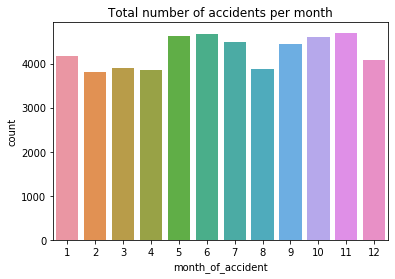

In [92]:
ax = plt.subplots()
ax = sns.countplot('month_of_accident', data=df)
ax.set_title('Total number of accidents per month')
plt.show()

## Average number of accidents each month

In [93]:
avg_num_of_accidents = df.groupby(['month_of_accident','borough']).count()[['casualties']] \
.groupby('month_of_accident').casualties.mean()
avg_num_of_accidents

month_of_accident
1     126.606061
2     115.454545
3     118.484848
4     116.909091
5     140.484848
6     141.515152
7     136.424242
8     117.454545
9     134.606061
10    139.696970
11    142.424242
12    123.696970
Name: casualties, dtype: float64

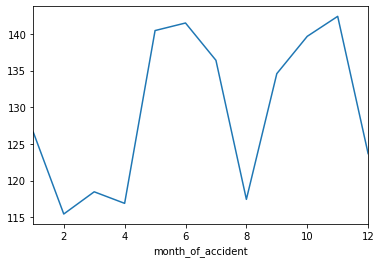

In [94]:
fig, ax = plt.subplots()
ax = avg_num_of_accidents.plot()
plt.show()

## Total number of accidents and people in each area

In [95]:
summarize = df.groupby('borough').agg({'casualties':'count','casualties_people_num':'sum'})

In [96]:
summarize.head()

,casualties,casualties_people_num
borough,,
Barking and Dagenham,1164,1588
Barnet,1986,2426
Bexley,972,1272
Brent,1862,2210
Bromley,1474,1788


## Average number of accidents each year per area

In [97]:
avg_accident_year = summarize['casualties'].apply(lambda x: x/12)
avg_accident_year

borough
Barking and Dagenham       97.000000
Barnet                    165.500000
Bexley                     81.000000
Brent                     155.166667
Bromley                   122.833333
Camden                    151.833333
City of London             47.333333
City of Westminster       251.666667
Croydon                   148.500000
Ealing                    157.500000
Enfield                   148.666667
Greenwich                 119.166667
Hackney                   142.500000
Hammersmith and Fulham    117.833333
Haringey                  142.833333
Harrow                     69.000000
Havering                   95.666667
Hillingdon                120.833333
Hounslow                  131.000000
Islington                 128.000000
Kensington and Chelsea    113.833333
Kingston                   55.166667
Lambeth                   214.500000
Lewisham                  139.333333
Merton                     82.833333
Newham                    142.666667
Redbridge                 126.